In [10]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# output_path = "/run/media/yunchen/lacie"
output_path="."
RANDOM_STATE = 1234


In [11]:
def find_embedding_for_property(property_df,street_df,emb_df):
    street_with_embedding = street_df.merge(emb_df, left_index=True, right_index=True)
    output_df = property_df.merge(street_with_embedding,on=["street_sources","street_targets"])
    return output_df


In [12]:
akl_embedding_df = pd.read_csv(f"./outputs/akl_embedding_1668642785.csv")
AKL_df = pd.read_csv(f"{output_path}/datasets/property_data_with_street.csv",encoding='latin1')
AKL_df = AKL_df.drop(['Unnamed: 0'],axis=1)
embedding_size = akl_embedding_df.shape[1]

akl_embedding_df.columns = ['street_embedding_'+str(i) for i in range(embedding_size)]
akl_street_nodes_df = pd.read_csv(f"{output_path}/datasets/akl_street_nodes.csv")
akl_street_nodes_df = akl_street_nodes_df.rename(columns={"source": "street_sources", "target": "street_targets"})

AKL_df = find_embedding_for_property(AKL_df,akl_street_nodes_df,akl_embedding_df)

In [13]:
tsne_embedding_df = AKL_df[AKL_df.columns.intersection(akl_embedding_df.columns)]
print(tsne_embedding_df.shape)

(40737, 16)


/run/media/yunchen/lacie/projects/uoa_789_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/run/media/yunchen/lacie/projects/uoa_789_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/run/media/yunchen/lacie/projects/uoa_789_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/run/media/yunchen/lacie/projects/uoa_789_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/run/media/yunchen/lacie/projects/uoa_789_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The d

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

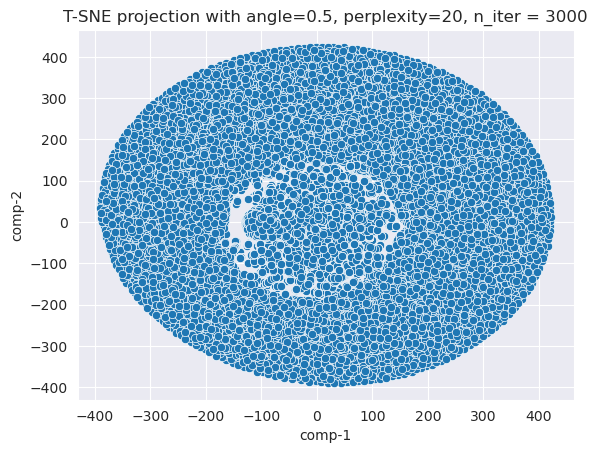

In [14]:
angles = [0.1,0.3,0.5]
perplexities = [10,15,20]
n_iters = [3000]
for angle in angles:
    for p in perplexities:
        for n_iter in n_iters:
            tsne_embedded = TSNE(n_components=2,learning_rate='auto',angle=angle,n_iter=n_iter, perplexity=p,random_state=RANDOM_STATE,n_jobs=3).fit_transform(tsne_embedding_df.copy())

            df = pd.DataFrame()
            df["comp-1"] = tsne_embedded[:,0]
            df["comp-2"] = tsne_embedded[:,1]
            plt.clf()
            plt.figure()
            sns.scatterplot(x="comp-1", y="comp-2", data=df).set(title=f"T-SNE projection with angle={angle}, perplexity={p}, n_iter = {n_iter}")
            plt.savefig(f"./outputs/visualized_embeddings_without_amenity_filters/visual_embedding_with_angle={angle}_preplexity={p}_iteration={n_iter}.pdf")

In [15]:
# df = pd.DataFrame()
# df["comp-1"] = tsne_embedded[:,0]
# df["comp-2"] = tsne_embedded[:,1]
#
# sns.scatterplot(x="comp-1", y="comp-2", data=df).set(title="T-SNE projection")

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+.02, point['y'], str(point['val']))
#
# label_point(df["comp-1"], df["comp-2"], df["y"], plt.gca())